In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from __future__ import division

import os

import numpy as np
import math as m

from glob import glob

import reduce_dblspec 
import pipeline

from astropy import constants as const
from astropy.table import Table, join


from astropy.io import fits
from astropy import units as u
from astropy import modeling
from astropy.modeling import models, fitting
from astropy.table import Table
from photutils import centroid_com


from astropy import modeling
from astropy import constants as cnst
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

# Local Group data

In [2]:
#Table 3 1st page of local group galaxies, magnitude, mag-errors
Galaxies = ['Canis-Major', 'Sagittarius-dSph', 'Segue', 'Ursa Major-II', 'Bootes-II', 'Segue-II', 'Willman-I', 'Coma Berenices', 'Bootes-III', 'LMC', 'SMC', 'Bootes', 'Draco', 'Ursa-Minor', 'Sculptor', 'Sextans', 'Ursa-Major', 'Carina', 'Hercules', 'Fornax', 'Leo-IV', 'Canes-Venatici-II', 'Leo-V', 'Pisces-II', 'Canes-Venatici', 'Leo-II', 'Leo-I', 'M32', 'Andromeda-IX', 'NGC-205', 'Andromeda-XVII', 'Andromeda-I', 'Andromeda-XXVII', 'Andromeda-III', 'Andromeda-XXV', 'Andromeda-XXVI', 'Andromeda-XI', 'Andromeda-V', 'Andromeda-X', 'Andromeda-XXIII', 'Andromeda-XX', 'Andromeda-XII', 'NGC-147', 'Andromeda-XXI', 'Andromeda-XIV', 'Andromeda-XV', 'Andromeda-XIII', 'Andromeda-II', 'NGC-185', 'Andromeda-XXIX', 'Andromeda-XIX', 'Triangulum', 'Andromeda-XXIV', 'Andromeda-VII', 'Andromeda-XXII', 'IC-10', 'LGS-3', 'Andromeda-VI', 'Andromeda-XVI', 'Andromeda-XXVIII', 'IC-1613', 'Phoenix', 'NGC-6822', 'Cetus', 'Pegasus-dIrr', 'Leo-T', 'WLM', 'Leo-A', 'Andromeda-XVIII', 'Aquarius', 'Tucana', 'Sagittarius-dIrr', 'UGC-4879', 'NGC-3109', 'Sextans-B', 'Antlia', 'Sextans-A', 'KKR-25', 'ESO-410-G-005', 'NGC-55', 'ESO-294-G-010', 'NGC-300', 'IC-5152', 'KKH-98', 'UKS-2323-326', 'KKR-3', 'GR-8', 'UGC-9128', 'UGC-8508', 'IC-3104', 'DDO-125', 'UGCA-86', 'DDO-99', 'IC-4662', 'DDO-190', 'KKH-86', 'NGC-4163', 'DDO-113'] 
M_v = [-14.4, -13.5, -1.5, -4.2, -2.7, -2.5, -2.7, -4.1, -5.8, -18.1, -16.8, -6.3, -8.8, -8.8, -11.1, -9.3, -5.5, -9.1, -6.6, -13.4, -5.8, -4.9, -5.2, -5.0, -8.6, -9.8, -12.0, -16.4, -8.1, -16.5, -8.7, -11.7, -7.9, -10.0, -9.7, -7.1, -6.9, -9.1, -7.6, -10.2, -6.3, -6.4, -14.6, -9.9, -8.4, -9.4, -6.7, -12.4, -14.8, -8.3, -9.2, -18.8, -7.6, -12.6, -6.5, -15.0, -10.1, -11.3, -9.2, -8.5, -15.2, -9.9, -15.2, -11.2, -12.2, -8.0, -14.2, -12.1, -9.7, -10.6, -9.5, -11.5, -12.5, -14.9, -14.5, -10.4, -14.3, -10.5, -11.5, -18.5, -11.2, -18.5, -15.6, -11.8, -13.2, -9.5, -12.2, -12.4, -13.4, -14.0, -14.4, -13.2, -13.2, -15.8, -14.4, -10.0, -14.1, -11.0]
err = [0.8, 0.3, 0.8, 0.6, 0.9, 0.3, 0.8, 0.5, 0.5, 0.1, 0.2, 0.2, 0.3, 0.5, 0.5, 0.5, 0.3, 0.5, 0.4, 0.3, 0.4, 0.5, 0.4, 0.0, 0.2, 0.3, 0.3, 0.2, 1.1, 0.1, 0.4, 0.1, 0.5, 0.3, 0.5, 0.5, 1.3, 0.2, 1.0, 0.5, 0.0, 1.2, 0.1, 0.6, 0.6, 0.4, 1.3, 0.2, 0.1, 0.4, 0.6, 0.1, 0.5, 0.3, 9.9, 0.2, 0.1, 0.2, 0.4, 0.0, 0.2, 0.4, 0.2, 0.2, 0.2, 0.5, 0.1, 0.2, 0.0, 0.1, 0.2, 0.3, 0.2, 0.1, 0.2, 0.2, 0.1, 0.2, 0.3, 0.2, 0.3, 0.1, 0.0, 0.3, 0.2, 0.3, 0.2, 0.3, 0.1, 0.0, 0.3, 0.0, 0.2, 0.3, 0.1, 0.3, 0.3, 0.3]
print("mag",len(M_v),"mag errs", len(err), "gal names", len(Galaxies))

#making a table to match with vels table later
table3 = Table([Galaxies, M_v, err],names=('names','M_v','err'))

mag 98 mag errs 98 gal names 98


In [3]:
#Local Group 2nd table - need to calculate velocities (y-axis)

#table 4  for lg velocities
sigma = [20.0, 11.4, 3.9, 6.7, 10.5, 3.4, 4.3, 4.6, 14.0, 20.2, 27.6, 2.4, 9.1, 9.5, 9.2, 7.9, 7.6, 6.6, 3.7, 11.7, 3.3, 4.6, 3.7, 0, 7.6, 6.6, 9.2, 92.0, 4.5, 35.0, 0, 10.6, 0, 4.7, 0, 0, 4.6, 11.5, 3.9, 0, 0, 2.6, 16.0, 0, 5.4, 11.0, 9.7, 7.3, 24.0, 0, 0, 0, 0, 9.7, 0, 0, 7.9, 9.4, 10.0, 0, 0, 0, 0, 17.0, 0, 7.5, 17.5, 9.3, 0, 0, 15.8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sigma_err =[3.0, 0.7, 0.8, 1.4, 7.4, 0, 0, 0.8, 3.2, 0.5, 0.5, 0, 1.2, 1.2, 1.4, 1.3, 1.0, 1.2, 0.9, 0.9, 1.7, 1.0, 0, 0, 0.4, 0.7, 1.4, 5.0, 3.6, 5.0, 0, 1.1, 0, 1.8, 0, 0, 0, 1.2, 0, 0, 0, 1.0, 0, 1.3, 0, 0, 0.8, 1.0, 0, 0, 0, 1.6, 0, 0, 0, 0, 0, 0, 0, 0, 2.0, 0, 1.6, 2.0, 1.3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
vel = [0, 0, 0, 0, 0, 0, 0, 0, 0, 49.8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 55.0, 0, 11.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17.0, 0, 0, 0, 0, 0, 15.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7.7, 0, 0, 20.8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
vel_err =[0, 0, 0, 0, 0, 0, 0, 0, 0, 15.9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.0, 0, 5.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.0, 0, 0, 0, 0, 0, 5.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.2, 0, 0, 2.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [4]:
#calculate LG velocities

table4 = Table( [sigma,sigma_err,vel,vel_err],names = ('sigma','sigma_err','vel','vel_err'))
table4['names'] = Galaxies
#print(np.shape(table4),table4[9]['vel'])


#for loop to chose btwn using velocity or applying formula based on sigma values
indices = np.arange(0,len(table4),1)
s_pt5 =[]

for i in indices:
    #print('i',i)
    if table4[i]['vel'] > table4[i]['sigma']:
        s_pt5part = table4[i]['vel']
        print('chose vel for',i,'sigma value problem if =0.0 and sigma value here is:',table4[i]['sigma'])
    else:
        #s_pt5 = np.sqrt()
        coeff = np.sqrt(2) #= 1/np.sqrt(.5)
        v = table4[i]['vel']
        s = table4[i]['sigma']
        s_pt5part = coeff * np.sqrt((.5 * v**2) + s**2)
    s_pt5.append(s_pt5part)
#print('s 1/2',s_pt5)

table4['s 1/2'] = s_pt5

chose vel for 9 sigma value problem if =0.0 and sigma value here is: 20.2
chose vel for 42 sigma value problem if =0.0 and sigma value here is: 16.0
chose vel for 61 sigma value problem if =0.0 and sigma value here is: 0.0
chose vel for 64 sigma value problem if =0.0 and sigma value here is: 0.0


In [5]:
#matching tables to get mags (x-axis) for only LGs that have a vel (y-axis) value

mergedata=(join(table3, table4, keys=['names'])) #merges mag&vel tables for LG, matched by gal names
nozeros_merged = np.where(mergedata['s 1/2'] != 0.0) #removes all non-value data rows
bothtable_nozeros = mergedata[nozeros_merged]
bothtable_nozeros

names,M_v,err,sigma,sigma_err,vel,vel_err,s 1/2
str17,float64,float64,float64,float64,float64,float64,float64
Andromeda-I,-11.7,0.1,10.6,1.1,0.0,0.0,14.990663761154808
Andromeda-II,-12.4,0.2,7.3,1.0,0.0,0.0,10.323759005323595
Andromeda-III,-10.0,0.3,4.7,1.8,0.0,0.0,6.646803743153548
Andromeda-IX,-8.1,1.1,4.5,3.6,0.0,0.0,6.3639610306789285
Andromeda-V,-9.1,0.2,11.5,1.2,0.0,0.0,16.263455967290593
Andromeda-VI,-11.3,0.2,9.4,0.0,0.0,0.0,13.293607486307096
Andromeda-VII,-12.6,0.3,9.7,0.0,0.0,0.0,13.717871555019022
Andromeda-X,-7.6,1.0,3.9,0.0,0.0,0.0,5.515432893255071
Andromeda-XI,-6.9,1.3,4.6,0.0,0.0,0.0,6.505382386916237


# SAGA data

In [6]:
#SAGA mags (x-axis)

#need: Dune, ody8, sd2, ody2?, st-1,st-2
#mr:-17.1,-14.1,-16.1,-17.0,
#gr:.41,.23,.37,.40
#sY: -92.177,-150.0,
#sy sd2: 137.14woffset6.98,106.489woffset-2.95
#table 2 from saga paper (6) M_r and (7) g-r
saga_names = ['Catch22-1','AnaK-2','Catch22-2','AnaK-1', 'Gilgamesh-1','Odyssey-8','Dune-1','StarTrek-1','ScoobyDoo-2-19th','Odyssey-2']
#,'Ody3'
M_r = [-20.1,-17.1,-17.9, -19.0,-18.0,-14.1,-17.1,-17.5,-16.1,-17.0] 
#,-16.0
gr = [0.68,0.41,0.19,0.41,0.51,0.23,0.41,0.30,0.37, 0.40]
#,0.38
M_v_saga = [] 
#combo = np.array((M_r[i],gr[i]) for i in range(len(M-r+1))) #dont know why wont make it a tuple but no time, jsut force it
combo = [(-20.1,0.68),(-17.1,0.41),(-17.9,0.19),(-19.0,0.41),(-18.0,0.51),(-14.1,0.23),(-17.1,0.41),(-17.5,0.30),(-16.1,0.37),(-17.0,0.40)]
#,(-16.0,0.38)
print(combo)

#eqt for M_r to M_v from Jester+ 2005
for i,j in combo:
    #M_v_saga = M_r + (0.42)*((gr + 0.22)/1.02) - 0.11
    M_v_saga_eqt = i + (0.42)*((j + 0.22)/1.02) - 0.11
    M_v_saga.append(M_v_saga_eqt)
print('plot these mags for saga',M_v_saga) #replace Sx below with M_v_saga

[(-20.1, 0.68), (-17.1, 0.41), (-17.9, 0.19), (-19.0, 0.41), (-18.0, 0.51), (-14.1, 0.23), (-17.1, 0.41), (-17.5, 0.3), (-16.1, 0.37), (-17.0, 0.4)]
plot these mags for saga [-19.839411764705883, -16.95058823529412, -17.841176470588234, -18.85058823529412, -17.80941176470588, -14.02470588235294, -16.95058823529412, -17.395882352941175, -15.967058823529413, -16.854705882352942]


In [7]:
# (73.33126586 + 74.13208222) / 2 #averaged Gilgamesh-1 #didnt end up doing this - used second value then changed completely so this wasnt used

In [8]:
# SAGA velocities
saga_names = ['Catch22-1',
              'AnaK-2',
              'Catch22-2',
              'AnaK-1', 
              'Gilgamesh-1',
              'Odyssey-8',
              'Dune-1',
              'StarTrek-1',
              'ScoobyDoo-2-19th',
              'Odyssey-2']
#,'Ody3'
best_fit_sigmas = [354.75526302788825, 39.07334317, 208.63496611, 106.66252460508608, -74.13208222,-150.0,-92.17769839882801,-39.77723154,137.14130325,-65.92233722]

#need to store upper/lower lims as 1d arrays for plotting
#non-np.abs(): OLD_saga_sigma_errors = [[3.4700393126143467, 3.4608250101399562],[4.247788290119274, 4.05160391305828],[3066.7600896753966, 73.5833077297778],[4.661898791451719, 4.391402255637047],[5.571468120902878, 5.533489582278918],[42.40200330133762, 62.83096007818445],[22.389120254029816, 187.80936242024373],[28.750903659989827, 152.6033782993453],[0.0, 170.0],[4.789829315218427, 6.199135957970526]]
hierr = np.array([3.5938922899522936,
                  4.310868559395189,
                  4501.505135852164,
                  4.135497997765697,
                  5.597857655117153,
                  59.13706289331462,
                  255.48964674188966,
                  
                  56.47565431614792,
                  42.87978503217879,
                  5.891799610473541]) / 2 #b/c do same below for velocity
loerr = np.array([3.538460509967422,
                  3.8669880244786654,
                  73.8553730058668,
                  4.860417633925849,
                  4.693769878364023,
                  41.45314970369645,
                  26.10818967746966,
                  
                  24.270890412488022, 
                  55.23956651754635, 
                  4.9808705519225995]) / 2 #b/c do same below for velocity
### change those above to only 0.1 sigfigs




saga_velocities = np.abs([i/2 for i in best_fit_sigmas])
print(saga_velocities)
#Sy = [183.14,19.5366,57.608,29,53.331, 73.732]# vel km/s-----divide sigma from fit in half
# saving saga data table
print(len(saga_names),len(M_r),len(gr),len(M_v_saga),len(saga_velocities))

saga = Table([saga_names, M_r, gr, M_v_saga, saga_velocities],names=('names','mag-rband','g-r','mag-vband','velocities'))#, saga_sigma_errors ,'vel_err'
print(saga)
#myarray = np.arange(0,len(table4_nozeros),1)
#for i in myarray:
#    if table4_nozeros[i] >= 
justnames = [saga['names']]
print(justnames)


[177.37763151  19.53667159 104.31748305  53.3312623   37.06604111
  75.          46.0888492   19.88861577  68.57065162  32.96116861]
10 10 10 10 10
     names       mag-rband g-r       mag-vband          velocities    
---------------- --------- ---- ------------------- ------------------
       Catch22-1     -20.1 0.68 -19.839411764705883 177.37763151394412
          AnaK-2     -17.1 0.41  -16.95058823529412       19.536671585
       Catch22-2     -17.9 0.19 -17.841176470588234      104.317483055
          AnaK-1     -19.0 0.41  -18.85058823529412  53.33126230254304
     Gilgamesh-1     -18.0 0.51  -17.80941176470588        37.06604111
       Odyssey-8     -14.1 0.23  -14.02470588235294               75.0
          Dune-1     -17.1 0.41  -16.95058823529412  46.08884919941401
      StarTrek-1     -17.5  0.3 -17.395882352941175        19.88861577
ScoobyDoo-2-19th     -16.1 0.37 -15.967058823529413       68.570651625
       Odyssey-2     -17.0  0.4 -16.854705882352942        32.96116861


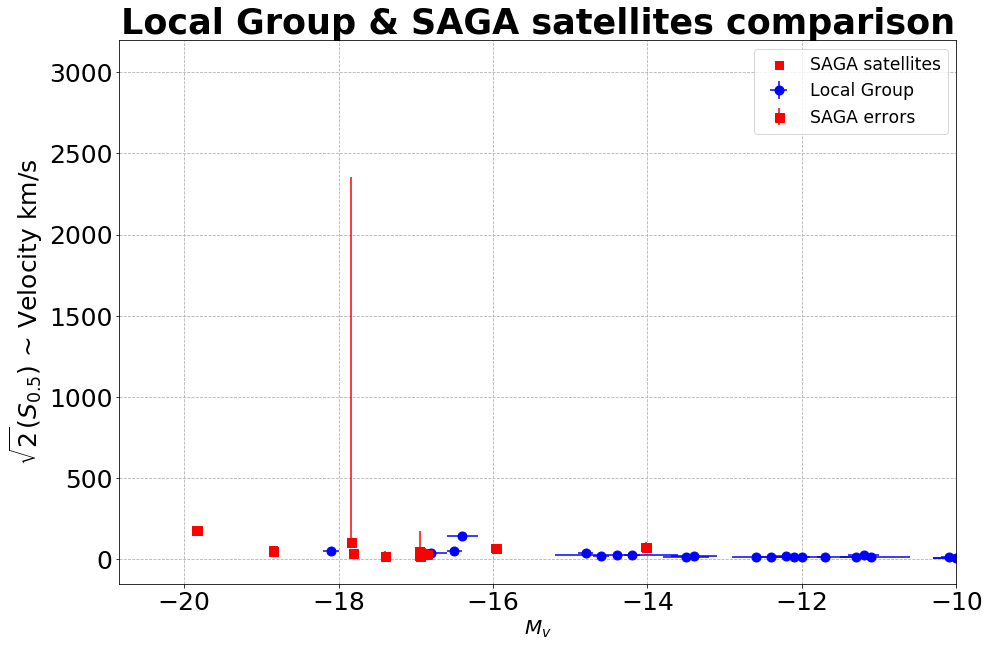

In [9]:
#sanity check

LGx = bothtable_nozeros['M_v']
LGy = bothtable_nozeros['s 1/2']
xebar = bothtable_nozeros['err']
yebar = bothtable_nozeros['sigma_err'] + bothtable_nozeros['vel_err']
#Sx = [-20.1,-17.1,-17.9,-16] #made these up for  saga M_r

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
#fig, ax = plt.subplots()
ax.errorbar(LGx,LGy,xerr=xebar,yerr=yebar,fmt='o',markersize=9,color='b',label='Local Group')
ax.scatter(M_v_saga,saga_velocities,marker="s",color='r',s=(75,75),label='SAGA satellites')

ax.errorbar(M_v_saga,saga_velocities,yerr=(loerr, hierr),fmt='s',markersize=9,color='r',label='SAGA errors')

#S, = ax.scatter(LGx,LGy,color = 'b',label='Local Group satellites',marker="o",s=15)
#Sa, = ax.scatter(M_v_saga,Sy, color='r',label='SAGA satellites', marker="s",s=15)
plt.title('Local Group & SAGA satellites comparison',size=35,fontweight='bold')
plt.ylabel(r'$\sqrt{2}(S_{0.5})$ ~ Velocity km/s',fontsize = 25)#(u'$L_{H \u03B1} / L_{ \u03bd ,2800}$',**csfont)
plt.xlabel(r'$M_v$',fontsize=20)#('Total Galaxy Mass ($M_{\odot}$)',**csfont)
#plt.legend(handles=[S, Sa], loc = 'best', fontsize = 35)#'xx-large'
plt.legend(fontsize='xx-large')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.grid(True, linestyle='--')
#plt.savefig('LG_SAGAcomparison.pdf', format='pdf', dpi=1000)
plt.xlim(np.min(M_v_saga)-1,-10.0)
plt.ylim(-150,3200) #to show approx lims of those crazy errorbars
plt.show()




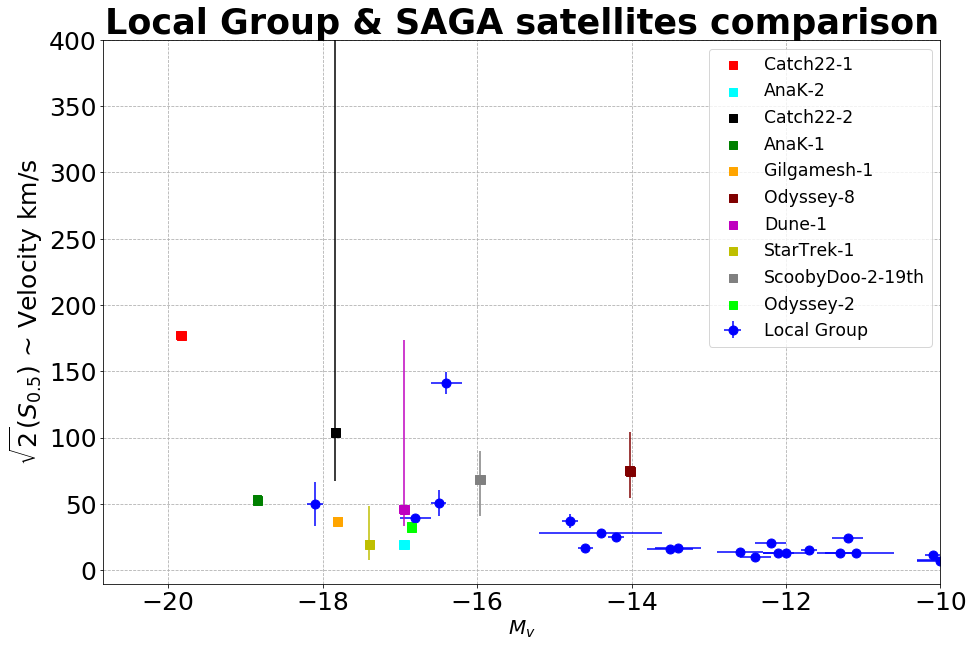

In [10]:
#sanity check

LGx = bothtable_nozeros['M_v']
LGy = bothtable_nozeros['s 1/2']
xebar = bothtable_nozeros['err']
yebar = bothtable_nozeros['sigma_err'] + bothtable_nozeros['vel_err']
#Sx = [-20.1,-17.1,-17.9,-16] #made these up for  saga M_r
colors= ['r','cyan','k','g','orange','maroon','m','y','gray','lime']
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
#fig, ax = plt.subplots()
ax.errorbar(LGx,LGy,xerr=xebar,yerr=yebar,fmt='o',markersize=9,color='b',label='Local Group')
for i in range(len(M_v_saga)):
    ax.scatter(M_v_saga[i],saga_velocities[i],marker="s",c=colors[i],s=(75,75),label=justnames[0][i])
    ax.errorbar(M_v_saga[i],saga_velocities[i],yerr=(np.array([loerr[i]]), np.array([hierr[i]])),fmt='s',markersize=9,c=colors[i])

#S, = ax.scatter(LGx,LGy,color = 'b',label='Local Group satellites',marker="o",s=15)
#Sa, = ax.scatter(M_v_saga,Sy, color='r',label='SAGA satellites', marker="s",s=15)
plt.title('Local Group & SAGA satellites comparison',size=35,fontweight='bold')
plt.ylabel(r'$\sqrt{2}(S_{0.5})$ ~ Velocity km/s',fontsize = 25)#(u'$L_{H \u03B1} / L_{ \u03bd ,2800}$',**csfont)
plt.xlabel(r'$M_v$',fontsize=20)#('Total Galaxy Mass ($M_{\odot}$)',**csfont)
#plt.legend(handles=[S, Sa], loc = 'best', fontsize = 35)#'xx-large'
plt.legend(fontsize='xx-large')
# plt.colorbar()
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.grid(True, linestyle='--')
#plt.savefig('LG_SAGAcomparison.pdf', format='pdf', dpi=1000)
plt.xlim(np.min(M_v_saga)-1,-10.0)
plt.ylim(-10,400)
plt.show()

In [11]:
sagatable = Table([justnames[0],M_v_saga,saga_velocities,loerr,hierr],names=('name','M_v','vel','vel_err_lo','vel_err_hi'))
sagatable

name,M_v,vel,vel_err_lo,vel_err_hi
str16,float64,float64,float64,float64
Catch22-1,-19.839411764705883,177.37763151394412,1.769230254983711,1.7969461449761468
AnaK-2,-16.95058823529412,19.536671585,1.9334940122393327,2.1554342796975945
Catch22-2,-17.841176470588234,104.317483055,36.9276865029334,2250.752567926082
AnaK-1,-18.85058823529412,53.33126230254304,2.4302088169629243,2.0677489988828484
Gilgamesh-1,-17.80941176470588,37.06604111,2.3468849391820115,2.7989288275585764
Odyssey-8,-14.02470588235294,75.0,20.726574851848223,29.56853144665731
Dune-1,-16.95058823529412,46.08884919941401,13.05409483873483,127.74482337094483
StarTrek-1,-17.395882352941175,19.88861577,12.135445206244011,28.23782715807396
ScoobyDoo-2-19th,-15.967058823529413,68.570651625,27.619783258773175,21.439892516089394


In [ ]:
old one below

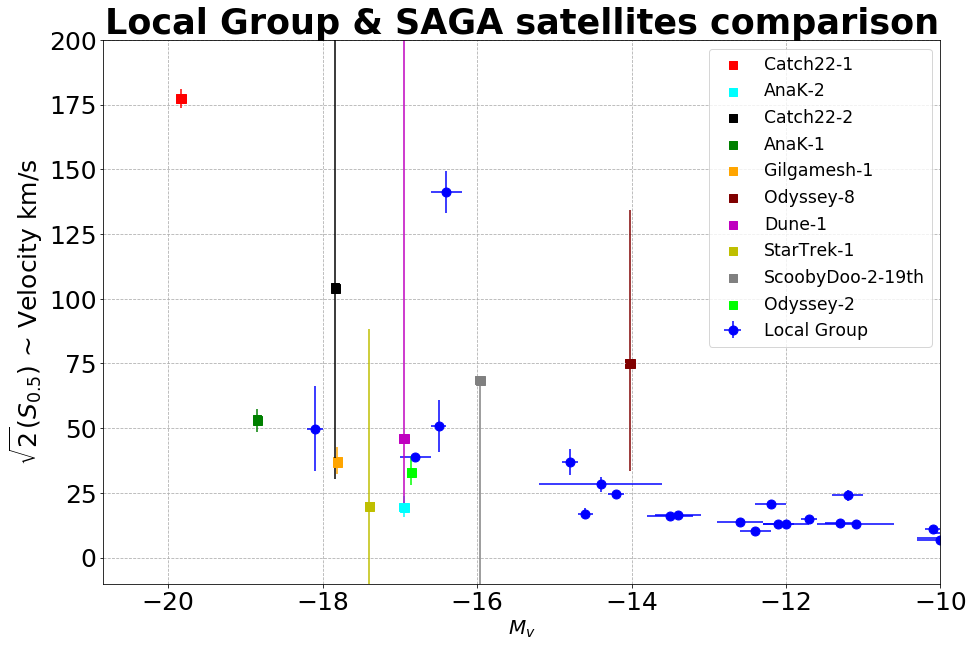

In [16]:
#sanity check

LGx = bothtable_nozeros['M_v']
LGy = bothtable_nozeros['s 1/2']
xebar = bothtable_nozeros['err']
yebar = bothtable_nozeros['sigma_err'] + bothtable_nozeros['vel_err']
#Sx = [-20.1,-17.1,-17.9,-16] #made these up for  saga M_r
colors= ['r','cyan','k','g','orange','maroon','m','y','gray','lime']
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
#fig, ax = plt.subplots()
ax.errorbar(LGx,LGy,xerr=xebar,yerr=yebar,fmt='o',markersize=9,color='b',label='Local Group')
for i in range(len(M_v_saga)):
    ax.scatter(M_v_saga[i],saga_velocities[i],marker="s",c=colors[i],s=(75,75),label=justnames[0][i])
    ax.errorbar(M_v_saga[i],saga_velocities[i],yerr=(np.array([loerr[i]]), np.array([hierr[i]])),fmt='s',markersize=9,c=colors[i])


#S, = ax.scatter(LGx,LGy,color = 'b',label='Local Group satellites',marker="o",s=15)
#Sa, = ax.scatter(M_v_saga,Sy, color='r',label='SAGA satellites', marker="s",s=15)
plt.title('Local Group & SAGA satellites comparison',size=35,fontweight='bold')
plt.ylabel(r'$\sqrt{2}(S_{0.5})$ ~ Velocity km/s',fontsize = 25)#(u'$L_{H \u03B1} / L_{ \u03bd ,2800}$',**csfont)
plt.xlabel(r'$M_v$',fontsize=20)#('Total Galaxy Mass ($M_{\odot}$)',**csfont)
#plt.legend(handles=[S, Sa], loc = 'best', fontsize = 35)#'xx-large'
plt.legend(fontsize='xx-large')
# plt.colorbar()
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.grid(True, linestyle='--')
#plt.savefig('LG_SAGAcomparison.pdf', format='pdf', dpi=1000)
plt.xlim(np.min(M_v_saga)-1,-10.0)
plt.ylim(-10,200)
plt.show()





In [12]:

# notes on errorbars for saga:
''' 
ody-8: errorbars might be bad b/c cant verify model fits via plotting -goterror, sig looks gauss but peak is offcenter from expected bestfit sig;
catch22-2: not the most gauss sigma distr for errorbars but good fits w weights;
dune-1: also had plotting error like ody8;
st-1: had meh 1000 fits alignment with best fit & only a meh hand-wavying gauss sig distribution;
sd-2-19: fits have high scatter but ok, sigmas not gauss and all the exact same;
'''

' \nody-8: errorbars might be bad b/c cant verify model fits via plotting -goterror, sig looks gauss but peak is offcenter from expected bestfit sig;\ncatch22-2: not the most gauss sigma distr for errorbars but good fits w weights;\ndune-1: also had plotting error like ody8;\nst-1: had meh 1000 fits alignment with best fit & only a meh hand-wavying gauss sig distribution;\nsd-2-19: fits have high scatter but ok, sigmas not gauss and all the exact same;\n'

# Inclination Angle Effects

In [13]:
#stokes params to get inclination
# from math import cos
# ratio = b/a

def ie_test(ratio):
    f = 1 - ratio
    e = m.sqrt(f*(2-f)) #f is for flattening
    inclin = e #assumption
    return inclin

def inc_from_ell(ratio): #textbook way (think this is right)
    inclin = m.asin(ratio) #b/c sin(i) = b/a
    return inclin

def ellip(ratio):#website way pt1
    ell = 1 - ratio
    return ell

def i_from_e(ell): #website way pt2
    ell_max = 0.8 #spirals edgeon
    if ell < ell_max:
        top = (1-ell)**2 - (1-ell_max)**2
        bottom = 1 - (1-ell_max)**2       
        inclin = m.sqrt(top/bottom) #cos**2
    else: #ell >= ell_max
        inclin = 0
    return inclin

In [14]:
ABnames = ['Odyssey-2','AnaK-1','AnaK-2','Catch22-2','Dune-1','Catch22-1','StarTrek-1','ScoobyDoo-2-19th','Gilgamesh-1','Odyssey-2']
devAB = [0.7694279,0.4023111,0.7366459,0.6529679,0.6450203,0.3340032,0.4559537,0.86335,0.7269291,0.500035]
devAB_err = [0.007780653,15.46238,0.02836374,0.008616767,0.00889235,0.001827916,0.006779711,0.04799373,0.01056067,0.1133037]
expAB = [0.7137948,0.5334178,0.7556656,0.6617505,0.6539081,0.3379471,0.432268,0.6729502,0.4616276,0.7081997]
expAB_err =[0.005541277,12.52522,0.01964892,0.007139304,0.006121655,0.001461798,0.003177066,0.02643801,0.003830639,0.09516757]
abtable = Table([ABnames,devAB,devAB_err,expAB,expAB_err],names=('name','devAB','devAB_err','expAB','expAB_err'))
len(ABnames),len(devAB),len(devAB_err),len(expAB),len(expAB_err),abtable

(10, 10, 10, 10, 10, <Table length=10>
       name         devAB    devAB_err    expAB    expAB_err 
      str16        float64    float64    float64    float64  
 ---------------- --------- ----------- --------- -----------
        Odyssey-2 0.7694279 0.007780653 0.7137948 0.005541277
           AnaK-1 0.4023111    15.46238 0.5334178    12.52522
           AnaK-2 0.7366459  0.02836374 0.7556656  0.01964892
        Catch22-2 0.6529679 0.008616767 0.6617505 0.007139304
           Dune-1 0.6450203  0.00889235 0.6539081 0.006121655
        Catch22-1 0.3340032 0.001827916 0.3379471 0.001461798
       StarTrek-1 0.4559537 0.006779711  0.432268 0.003177066
 ScoobyDoo-2-19th   0.86335  0.04799373 0.6729502  0.02643801
      Gilgamesh-1 0.7269291  0.01056067 0.4616276 0.003830639
        Odyssey-2  0.500035   0.1133037 0.7081997  0.09516757)

shifted exp+1 just to see better


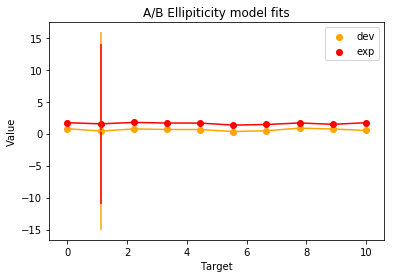

In [15]:
# to see visualization of ellipicity parameters
expAB =np.array(expAB)#need to be array to +1
expAB1 = expAB+1 #just did this to see points better
plt.scatter(np.linspace(0,len(devAB),len(devAB)),devAB,color='orange',label='dev')
plt.errorbar(np.linspace(0,len(devAB),len(devAB)),devAB,yerr=devAB_err,color='orange')
plt.scatter(np.linspace(0,len(expAB),len(expAB)),expAB1,color='r',label='exp')
plt.errorbar(np.linspace(0,len(expAB),len(expAB)),expAB1,yerr=expAB_err,color='r')
plt.ylabel('Value');plt.xlabel('Target');plt.legend();plt.title('A/B Ellipiticity model fits');
print('shifted exp+1 just to see better')

In [16]:
## doing first way - i from sdss to correct velocity

# get i 
i_web = [];i_txtbk = [];ie_ = []
# myway = []
for ratio in abtable['devAB']:
    ell = ellip(ratio) #web pt1 
    inc1 = i_from_e(ell) #web pt2
    inc2 = inc_from_ell(ratio)#textbk way
    inc3 = ie_test(ratio) #test i = e
    i_web.append(inc1)
    i_txtbk.append(inc2)
    ie_.append(inc3)
#     myway.append(ell)
    print('inclination angles:',inc1, inc2,inc3)

inclination angles: 0.7583007959812806 0.8779449893617582 0.63873367431316
inclination angles: 0.3562744453355826 0.4140398546558701 0.9155030195563475
inclination angles: 0.7235957535596749 0.8280972260333498 0.6762786541161787
inclination angles: 0.6344018495388738 0.7114964613794654 0.7573855831540431
inclination angles: 0.6258753764828856 0.7010498478577967 0.7641654353527841
inclination angles: 0.2730196452223417 0.34054749966900627 0.9425719401667758
inclination angles: 0.41819774098665785 0.47344348918924056 0.8900034963169021
inclination angles: 0.8571836287736134 1.0418712867413866 0.5046055662594301
inclination angles: 0.7132860550143449 0.8138394148527157 0.6867125188702985
inclination angles: 0.46774614868470593 0.5236391905886669 0.8660051955819895


In [17]:
#correct velocities

#match tables 
inclintable = join(sagatable, abtable,keys='name')
inclintable

name,M_v,vel,vel_err_lo,vel_err_hi,devAB,devAB_err,expAB,expAB_err
str16,float64,float64,float64,float64,float64,float64,float64,float64
AnaK-1,-18.85058823529412,53.33126230254304,2.4302088169629243,2.0677489988828484,0.4023111,15.46238,0.5334178,12.52522
AnaK-2,-16.95058823529412,19.536671585,1.9334940122393327,2.1554342796975945,0.7366459,0.02836374,0.7556656,0.01964892
Catch22-1,-19.839411764705883,177.37763151394412,1.769230254983711,1.7969461449761468,0.3340032,0.001827916,0.3379471,0.001461798
Catch22-2,-17.841176470588234,104.317483055,36.9276865029334,2250.752567926082,0.6529679,0.008616767,0.6617505,0.007139304
Dune-1,-16.95058823529412,46.08884919941401,13.05409483873483,127.74482337094483,0.6450203,0.00889235,0.6539081,0.006121655
Gilgamesh-1,-17.80941176470588,37.06604111,2.3468849391820115,2.7989288275585764,0.7269291,0.01056067,0.4616276,0.003830639
Odyssey-2,-16.854705882352942,32.96116861,2.4904352759612998,2.9458998052367704,0.7694279,0.007780653,0.7137948,0.005541277
Odyssey-2,-16.854705882352942,32.96116861,2.4904352759612998,2.9458998052367704,0.500035,0.1133037,0.7081997,0.09516757
ScoobyDoo-2-19th,-15.967058823529413,68.570651625,27.619783258773175,21.439892516089394,0.86335,0.04799373,0.6729502,0.02643801


In [18]:
txtsini = []; iesini=[]; #mywaysin=[]
for i in range(10):
    txtsini.append(m.sin(i_txtbk[i]))
    iesini.append(m.sin(ie_[i]))
#     mywaysin.append(m.sin(myway[i]))

NEW VELOCIITES: OG: 53.33126230254304 txt/sini: 69.31287818201424 web: 70.32995690520094
NEW VELOCIITES: OG: 19.536671585 txt/sini: 48.56110503786746 web: 54.83601712325448
NEW VELOCIITES: OG: 177.37763151394412 txt/sini: 240.79090308375322 web: 245.1335993078293
NEW VELOCIITES: OG: 104.317483055 txt/sini: 159.75897598488376 web: 164.43439301260707
NEW VELOCIITES: OG: 46.08884919941401 txt/sini: 71.45333131285017 web: 73.63901973330675
NEW VELOCIITES: OG: 37.06604111 txt/sini: 110.97510775345864 web: 135.7632747629357
NEW VELOCIITES: OG: 32.96116861 txt/sini: 72.29060452848611 web: 78.81718474192235
NEW VELOCIITES: OG: 32.96116861 txt/sini: 38.178222748595594 web: 38.45286762785948
NEW VELOCIITES: OG: 68.570651625 txt/sini: 94.32921535951718 web: 96.13345325196491
NEW VELOCIITES: OG: 19.88861577 txt/sini: 39.774447328686996 web: 42.52010588633695


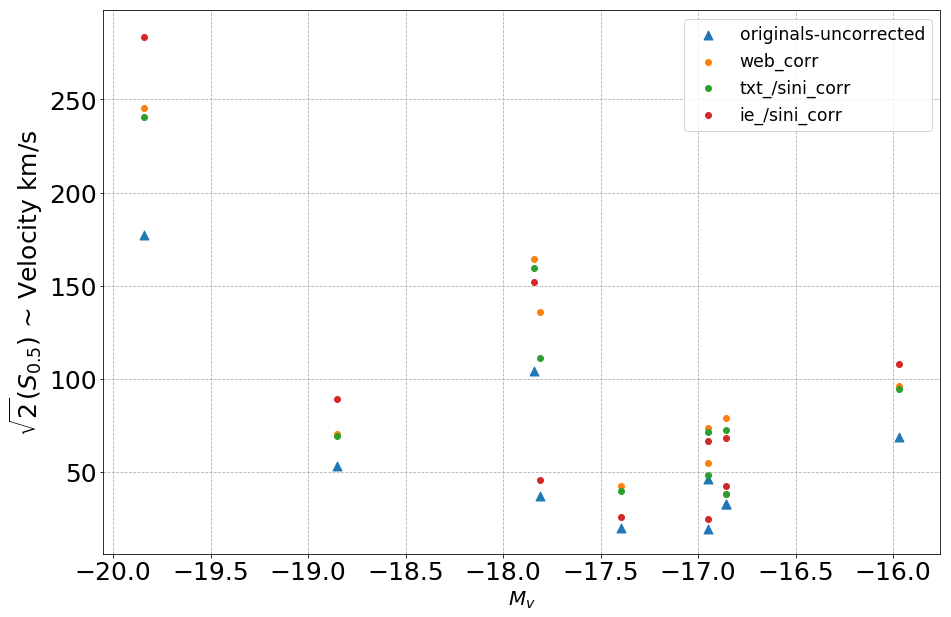

In [22]:
# corrected_vel_txtbk = inclintable['vel']/i_txtbk
corrected_vel_web = inclintable['vel']/i_web
corrected_vel_sini = inclintable['vel']/txtsini
corrected_vel_ie = inclintable['vel']/iesini
# corrected_vel_myway = inclintable['vel']/mywaysin

for i in range(10):
    print('NEW VELOCIITES: OG:',inclintable['vel'][i],'txt/sini:',corrected_vel_sini[i],'web:',corrected_vel_web[i])
    
plt.figure(figsize=(15,10))
plt.scatter(inclintable['M_v'],inclintable['vel'],marker='^',s=80,label='originals-uncorrected')
# plt.scatter(inclintable['M_v'],corrected_vel_txtbk,label='textbook_corr')
plt.scatter(inclintable['M_v'],corrected_vel_web,label='web_corr')
plt.scatter(inclintable['M_v'],corrected_vel_sini,label='txt_/sini_corr')
plt.scatter(inclintable['M_v'],corrected_vel_ie,label='ie_/sini_corr')
# plt.scatter(inclintable['M_v'],corrected_vel_myway,label='myway')





plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.grid(True, linestyle='--')
# plt.ylim(-10,300);plt.xlim(np.min(M_v_saga)-1,-15.0) #inclintable['M_v']
plt.legend(fontsize='xx-large')
plt.ylabel(r'$\sqrt{2}(S_{0.5})$ ~ Velocity km/s',fontsize = 25)#(u'$L_{H \u03B1} / L_{ \u03bd ,2800}$',**csfont)
plt.xlabel(r'$M_v$',fontsize=20)#('Total Galaxy Mass ($M_{\odot}$)',**csfont)
plt.show()



In [20]:
## doing 2nd way - mean i correction to correct velocity
#simulate fake disks
#inf thin, 3-5 pc scale height



# ------------------------Tests------------------------

In [25]:

# def ellipse_eqt(x,y,a,b):
#     #general ellipse eqts
#     (y**2/a**2) + (x**2/b**2) = 1
#     A*x**2 + B*x*y + C*y**2 + D =0
#     ax**2 + by**2 = 1 #(midterm +Cxy)

In [26]:
def ellipse(x_0,y_0,a,b):
    from math import pi
    t = np.linspace(0, 2*pi, 100)
    x = x_0+a*np.cos(t)
    y = y_0+b*np.sin(t)
    return x, y

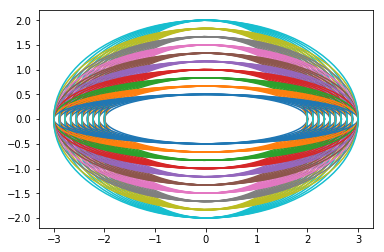

In [27]:
a = np.linspace(2,3,10)
b = np.linspace(.5,2,10)
ratios = [(i,j) for i in a for j in b] #a[i] with each b[i] ie (2,.5),(2,.6),(2,.8)...(3,.5),(3,.6)..
# ratios
for i,j in ratios:
    x,y = ellipse(0,0,i,j)
    plt.plot(x,y)

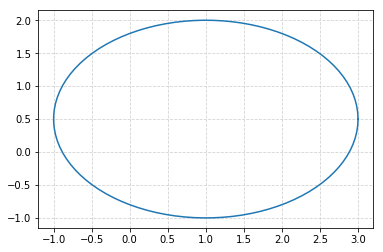

In [28]:
from math import pi

u=1.     #x-position of the center
v=0.5    #y-position of the center
a=2      #radius on the x-axis
b=1.5    #radius on the y-axis

t = np.linspace(0, 2*pi, 100)
plt.plot( u+a*np.cos(t) , v+b*np.sin(t) )
plt.grid(color='lightgray',linestyle='--');


In [29]:
t

array([0.        , 0.06346652, 0.12693304, 0.19039955, 0.25386607,
       0.31733259, 0.38079911, 0.44426563, 0.50773215, 0.57119866,
       0.63466518, 0.6981317 , 0.76159822, 0.82506474, 0.88853126,
       0.95199777, 1.01546429, 1.07893081, 1.14239733, 1.20586385,
       1.26933037, 1.33279688, 1.3962634 , 1.45972992, 1.52319644,
       1.58666296, 1.65012947, 1.71359599, 1.77706251, 1.84052903,
       1.90399555, 1.96746207, 2.03092858, 2.0943951 , 2.15786162,
       2.22132814, 2.28479466, 2.34826118, 2.41172769, 2.47519421,
       2.53866073, 2.60212725, 2.66559377, 2.72906028, 2.7925268 ,
       2.85599332, 2.91945984, 2.98292636, 3.04639288, 3.10985939,
       3.17332591, 3.23679243, 3.30025895, 3.36372547, 3.42719199,
       3.4906585 , 3.55412502, 3.61759154, 3.68105806, 3.74452458,
       3.8079911 , 3.87145761, 3.93492413, 3.99839065, 4.06185717,
       4.12532369, 4.1887902 , 4.25225672, 4.31572324, 4.37918976,
       4.44265628, 4.5061228 , 4.56958931, 4.63305583, 4.69652

In [94]:
# 𝐴𝑥2+𝐵𝑥𝑦+𝐶𝑦2+𝐷=0

 